# Temperature in Ann Arbor, Michigan, United States (2005-2014)

The data used in this comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

This Jupyter Notebook has some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. With a scatter overlay of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

%matplotlib notebook

df = pd.read_csv('data/noaa.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Month_day'] = df['Date'].dt.strftime('%m-%d')
df = df[df['Month_day']!='02-29']
tmax = df[df['Element']=='TMAX'].drop(['ID', 'Element'], axis=1)
tmin = df[df['Element']=='TMAX'].drop(['ID', 'Element'], axis=1)
high_record = (tmax[(tmax['Date']<'2015-01-01') & (tmax['Date']>='2005-01-01')]
              .groupby('Month_day')
              .max()['Data_Value'])
low_record = (tmin[(tmin['Date']<'2015-01-01') & (tmin['Date']>='2005-01-01')]
              .groupby('Month_day')
              .min()['Data_Value'])
high_record_2015 = (tmax[(tmax['Date']<'2016-01-01') & (tmax['Date']>='2015-01-01')]
                    .groupby('Month_day')
                    .max())
high_record_2015 = high_record_2015[high_record_2015['Data_Value'] > high_record]
low_record_2015 = (tmin[(tmin['Date']<'2016-01-01') & (tmin['Date']>='2015-01-01')]
                   .groupby('Month_day')
                   .min())
low_record_2015 = low_record_2015[low_record_2015['Data_Value']  < low_record]

<IPython.core.display.Javascript object>


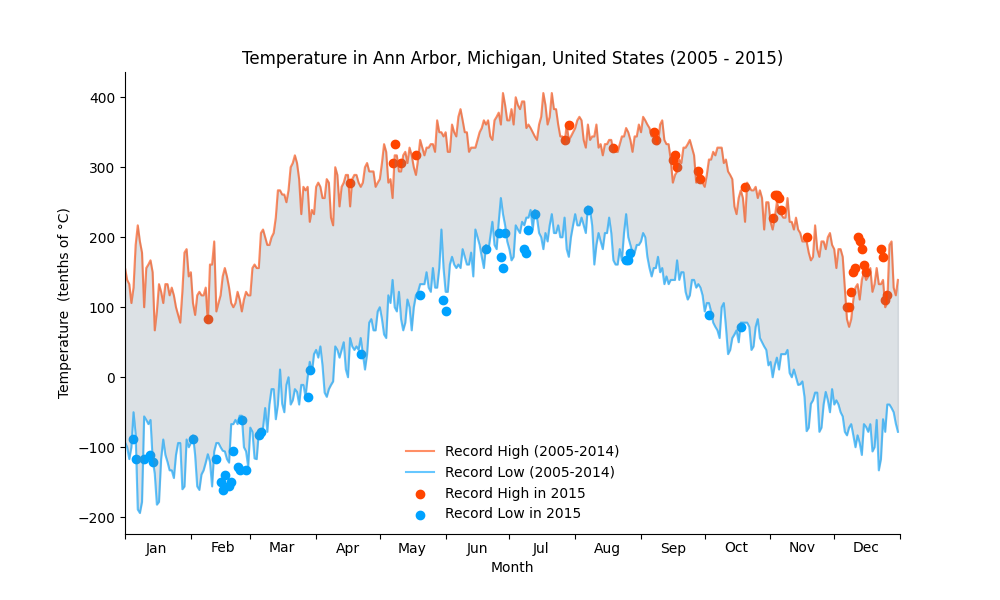

[(array(16436.), array(16801.))]

In [2]:
plt.figure(figsize=(10, 6))
date = np.arange('2015-01-01', '2016-01-01', dtype='datetime64[D]')

plt.plot(date, high_record, alpha=0.6, color='orangered')
plt.plot(date, low_record, alpha=0.6, color='#00A2FF')
plt.scatter(high_record_2015.Date.values, high_record_2015.Data_Value.values, color='orangered')
plt.scatter(low_record_2015.Date.values, low_record_2015.Data_Value.values, color='#00A2FF')

ax = plt.gca()
ax.fill_between(date, high_record, low_record, color='lightslategray', alpha=0.25)

plt.title('Temperature in Ann Arbor, Michigan, United States (2005 - 2015)')
plt.xlabel('Month')
plt.ylabel('Temperature  (tenths of °C)')
plt.legend(['Record High (2005-2014)', 'Record Low (2005-2014)', 'Record High in 2015', 'Record Low in 2015'],
           frameon=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=16))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

ax.set(xlim=('2015-01', '2016-01'))